In [87]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv(r"C:\Users\2099tu\Desktop\DAP mini project\StudentsPerformance.csv")

In [71]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Cleaning


In [72]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [74]:
df = pd.get_dummies(df, columns=['gender'])
df = pd.get_dummies(df, columns=['test preparation course'])
df = pd.get_dummies(df, columns=['race/ethnicity'])
df = pd.get_dummies(df, columns=['parental level of education'])
df = pd.get_dummies(df, columns=['lunch'])

In [91]:
df["Mean Score"] = (df['math score']+df['reading score']+df['writing score'] / 3).astype(int)

In [76]:
df.head()

,math score,reading score,writing score,gender_female,gender_male,test preparation course_completed,test preparation course_none,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,...,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,Mean Score
0,72,72,74,True,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,168
1,69,90,88,True,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,True,188
2,90,95,93,True,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,216
3,47,57,44,False,True,False,True,True,False,False,...,False,True,False,False,False,False,False,True,False,118
4,76,78,75,False,True,False,True,False,False,True,...,False,False,False,False,False,True,False,False,True,179


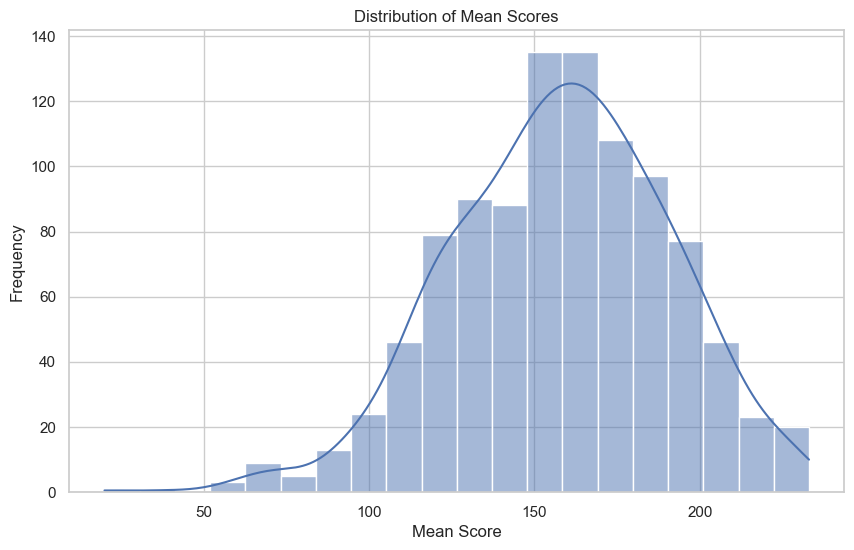

In [93]:
sns.set(style="whitegrid")

# 1. Distribution of Mean Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Mean Score'], bins=20, kde=True)
plt.title('Distribution of Mean Scores')
plt.xlabel('Mean Score')
plt.ylabel('Frequency')
plt.show()

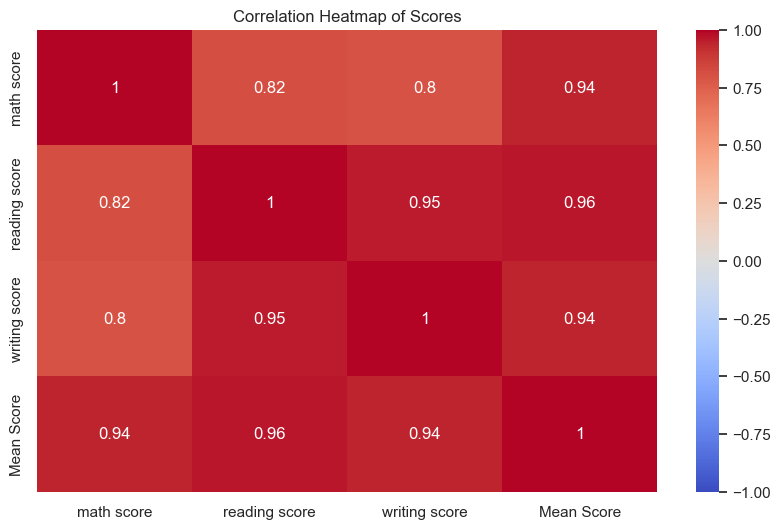

In [97]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['math score', 'reading score', 'writing score', 'Mean Score']].corr(), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Scores')
plt.show()

In [77]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [78]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size= 0.2)

In [80]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [81]:
y_pred = model.predict(x_test)

In [85]:
from sklearn.metrics import mean_squared_error,r2_score

In [86]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))

0.0737181914320027
0.9999365140857278


In [98]:
import pickle

with open ("LinearRegression.pkl",'wb') as file:
    pickle.dump(model,file)